# PROBLEM STATEMENT:
To Analyze if the is effect on Pain score based on duration of procedure for different age ranges.
And effect on BP and heart rate due to procedure and given indication score
(# Outliers,Missing data,Anamolous data (if any) just flag
Univariate analysis,Bivariate Analysis(label all graphs))

# Reading The Dataset(ET-L)

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df=pd.read_csv('Effect of drug on pain.csv')
df.head()

,Age,Group,Indication,Duration,Pulse pre procedure,Pulse post procedure,Sys BP pre procedure,Sys BP Post procedure,Performed by,Pain Score,Add analgesia
0,55,A,1,2.0,68.0,67,145,140,RESIDENT,0,No
1,38,A,1,6.0,72.0,70,139,140,RESIDENT,3,No
2,80,A,1,10.0,66.0,65,128,130,RESIDENT,2,No
3,27,A,3,4.0,82.0,80,140,138,RESIDENT,4,No
4,35,A,3,6.0,72.0,70,135,138,RESIDENT,4,No


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    60 non-null     int64  
 1   Group                  60 non-null     object 
 2   Indication             60 non-null     int64  
 3   Duration               60 non-null     float64
 4   Pulse pre procedure    52 non-null     float64
 5   Pulse post procedure   60 non-null     int64  
 6   Sys BP pre procedure   60 non-null     int64  
 7   Sys BP Post procedure  60 non-null     int64  
 8   Performed by           60 non-null     object 
 9   Pain Score             60 non-null     int64  
 10  Add analgesia          60 non-null     object 
dtypes: float64(2), int64(6), object(3)
memory usage: 5.3+ KB


# Summary Statistics

In [20]:
df.describe(include='all')

,Age,Group,Indication,Duration,Pulse pre procedure,Pulse post procedure,Sys BP pre procedure,Sys BP Post procedure,Performed by,Pain Score,Add analgesia
count,60.000000,60,60.000000,60.000000,52.000000,60.000000,60.000000,60.000000,60,60.000000,60
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,1
top,NaN,A,NaN,NaN,NaN,NaN,NaN,NaN,RESIDENT,NaN,No
freq,NaN,30,NaN,NaN,NaN,NaN,NaN,NaN,56,NaN,60
mean,46.750000,NaN,2.533333,5.511667,73.057692,74.316667,125.966667,126.000000,NaN,3.633333,NaN
std,16.117813,NaN,0.675646,2.136137,7.341564,6.510726,10.872086,10.003389,NaN,1.437591,NaN
min,18.000000,NaN,1.000000,2.000000,61.000000,64.000000,110.000000,110.000000,NaN,0.000000,NaN
25%,32.750000,NaN,2.000000,4.000000,68.000000,69.000000,117.000000,119.000000,NaN,3.000000,NaN
50%,49.000000,NaN,3.000000,5.150000,71.000000,75.000000,121.500000,120.000000,NaN,4.000000,NaN
75%,59.000000,NaN,3.000000,7.000000,79.000000,80.000000,138.000000,135.000000,NaN,4.000000,NaN


In [21]:
df['Indication'].value_counts()

3    38
2    16
1     6
Name: Indication, dtype: int64

In [22]:
df['Performed by'].value_counts()

RESIDENT      56
CONSULTANT     4
Name: Performed by, dtype: int64

# Missing Values

In [23]:
df.isnull().sum()

Age                      0
Group                    0
Indication               0
Duration                 0
Pulse pre procedure      8
Pulse post procedure     0
Sys BP pre procedure     0
Sys BP Post procedure    0
Performed by             0
Pain Score               0
Add analgesia            0
dtype: int64

In [24]:
df= df.drop(['Add analgesia'],axis=1)

In [25]:
df.shape

(60, 10)

# Interpolate the missing values in Pulse pre procedure

In [26]:
missing_pulse_pre=[]
for i in range(df.shape[0]):
    if pd.isnull(df['Pulse pre procedure'].iloc[i]):
        missing_pulse_pre.append(i)


In [27]:
missing_pulse_pre

[6, 13, 18, 19, 28, 29, 43, 59]

In [28]:
for x in missing_pulse_pre:
    print(df.iloc[x-1:x+1])

   Age Group  Indication  Duration  Pulse pre procedure  Pulse post procedure  \
5   44     A           3       7.0                 77.0                    76   
6   50     A           3       2.5                  NaN                    70   

   Sys BP pre procedure  Sys BP Post procedure Performed by  Pain Score  
5                   116                    120     RESIDENT           2  
6                   118                    120     RESIDENT           4  
    Age Group  Indication  Duration  Pulse pre procedure  \
12   78     A           3       4.2                 68.0   
13   69     A           3       7.0                  NaN   

    Pulse post procedure  Sys BP pre procedure  Sys BP Post procedure  \
12                    68                   130                    135   
13                    70                   119                    120   

   Performed by  Pain Score  
12     RESIDENT           3  
13     RESIDENT           0  
    Age Group  Indication  Duration  Pulse 

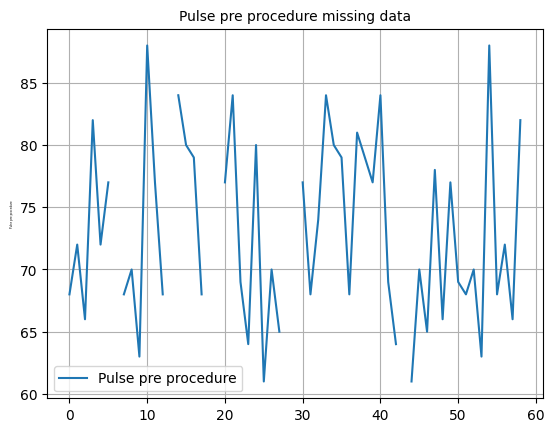

In [29]:
#plot for Original Pre Pulse Procedure Column
df.plot(y='Pulse pre procedure', use_index=True) #uses index values in x axis
plt.title("Pulse pre procedure missing data",fontsize=10)
plt.ylabel("Pulse pre procedure",fontsize=2)
#plt.xticks(rotation=90)
#plt.legend(loc=4)
plt.grid()

In [30]:
df['Pulse pre_cleaned_poly']=df['Pulse pre procedure'].interpolate(method='polynomial', order=2)

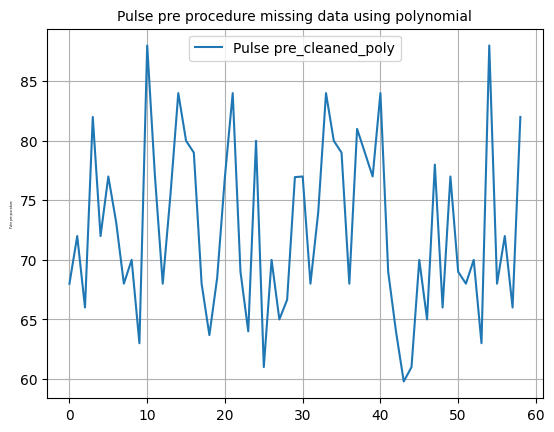

In [31]:
df.plot(y='Pulse pre_cleaned_poly', use_index=True)
plt.title("Pulse pre procedure missing data using polynomial",fontsize=10)
plt.ylabel("Pulse pre procedure",fontsize=2)
#plt.xticks(rotation=90)
#plt.legend(loc=4)
plt.grid()

In [32]:
df['Pulse pre_cleaned_poly'].isnull().sum()

1

In [33]:
df['Pulse pre_cleaned_poly'].fillna(method='ffill', inplace=True)

In [34]:
df['Pulse pre_cleaned_poly'].isnull().sum()

0

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     60 non-null     int64  
 1   Group                   60 non-null     object 
 2   Indication              60 non-null     int64  
 3   Duration                60 non-null     float64
 4   Pulse pre procedure     52 non-null     float64
 5   Pulse post procedure    60 non-null     int64  
 6   Sys BP pre procedure    60 non-null     int64  
 7   Sys BP Post procedure   60 non-null     int64  
 8   Performed by            60 non-null     object 
 9   Pain Score              60 non-null     int64  
 10  Pulse pre_cleaned_poly  60 non-null     float64
dtypes: float64(3), int64(6), object(2)
memory usage: 5.3+ KB


In [36]:
df_1=df.drop(['Pulse pre procedure'],axis=1)

In [37]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     60 non-null     int64  
 1   Group                   60 non-null     object 
 2   Indication              60 non-null     int64  
 3   Duration                60 non-null     float64
 4   Pulse post procedure    60 non-null     int64  
 5   Sys BP pre procedure    60 non-null     int64  
 6   Sys BP Post procedure   60 non-null     int64  
 7   Performed by            60 non-null     object 
 8   Pain Score              60 non-null     int64  
 9   Pulse pre_cleaned_poly  60 non-null     float64
dtypes: float64(2), int64(6), object(2)
memory usage: 4.8+ KB


# Univariate Analysis:Countplot

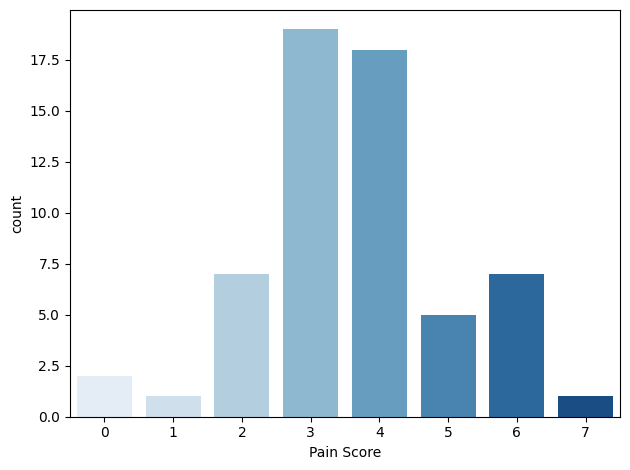

In [38]:
sns.countplot(x='Pain Score',data=df_1,palette='Blues')
plt.tight_layout()
plt.show()

# BoxPlot

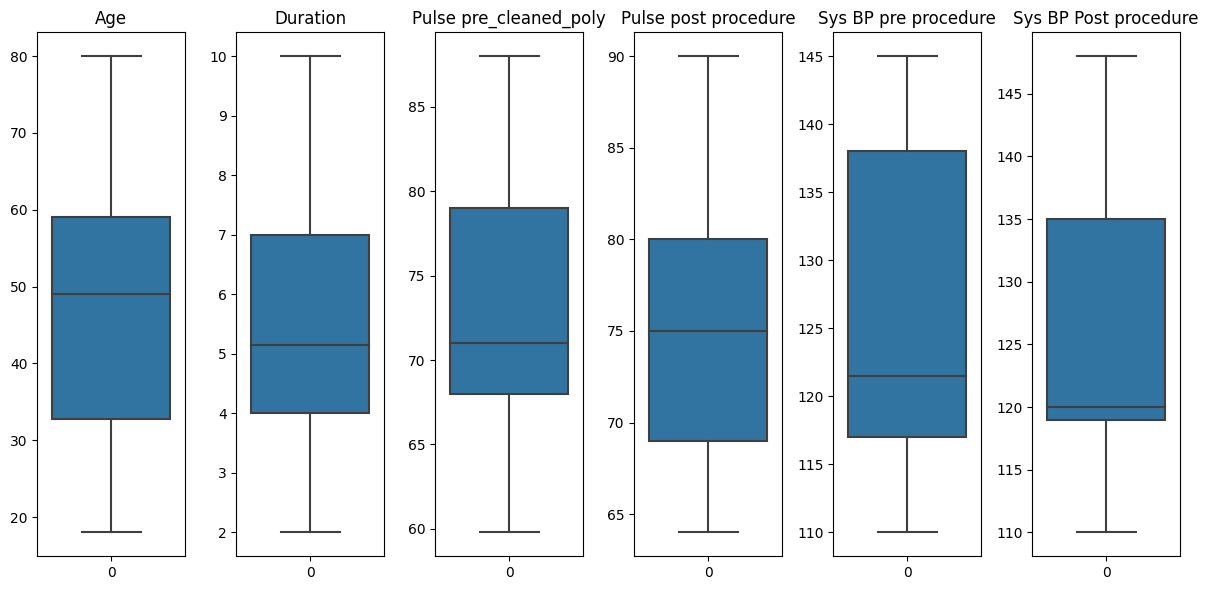

In [39]:
columns_to_plot=['Age','Duration','Pulse pre_cleaned_poly','Pulse post procedure','Sys BP pre procedure','Sys BP Post procedure']
fig ,axes = plt.subplots(ncols=len(columns_to_plot),figsize=(12,6))
for col,axis in zip(columns_to_plot,axes):
  sns.boxplot(data=df_1[col],ax=axis)
  axis.set_title(col)
  #fig.suptitle(col)
plt.tight_layout()
plt.show()

# Correlation:heatmap

In [40]:
df.corr()

<ipython-input-40-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Indication,Duration,Pulse pre procedure,Pulse post procedure,Sys BP pre procedure,Sys BP Post procedure,Pain Score,Pulse pre_cleaned_poly
Age,1.000000,-0.186769,0.233279,-0.049066,-0.115362,0.112634,0.149379,-0.123256,0.022924
Indication,-0.186769,1.000000,-0.024348,0.158994,0.134341,-0.299803,-0.426315,0.187296,0.113374
Duration,0.233279,-0.024348,1.000000,0.002424,-0.080703,-0.105513,0.019512,0.210598,0.079652
Pulse pre procedure,-0.049066,0.158994,0.002424,1.000000,0.853720,-0.011176,0.047418,-0.074631,1.000000
Pulse post procedure,-0.115362,0.134341,-0.080703,0.853720,1.000000,-0.016609,-0.106177,0.088671,0.697971
Sys BP pre procedure,0.112634,-0.299803,-0.105513,-0.011176,-0.016609,1.000000,0.466595,-0.035497,-0.023478
Sys BP Post procedure,0.149379,-0.426315,0.019512,0.047418,-0.106177,0.466595,1.000000,-0.091931,0.105998
Pain Score,-0.123256,0.187296,0.210598,-0.074631,0.088671,-0.035497,-0.091931,1.000000,-0.035542
Pulse pre_cleaned_poly,0.022924,0.113374,0.079652,1.000000,0.697971,-0.023478,0.105998,-0.035542,1.000000


<ipython-input-41-5f69ad872464>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_1.corr(),annot=True,yticklabels=True,cbar=True,cmap='coolwarm')


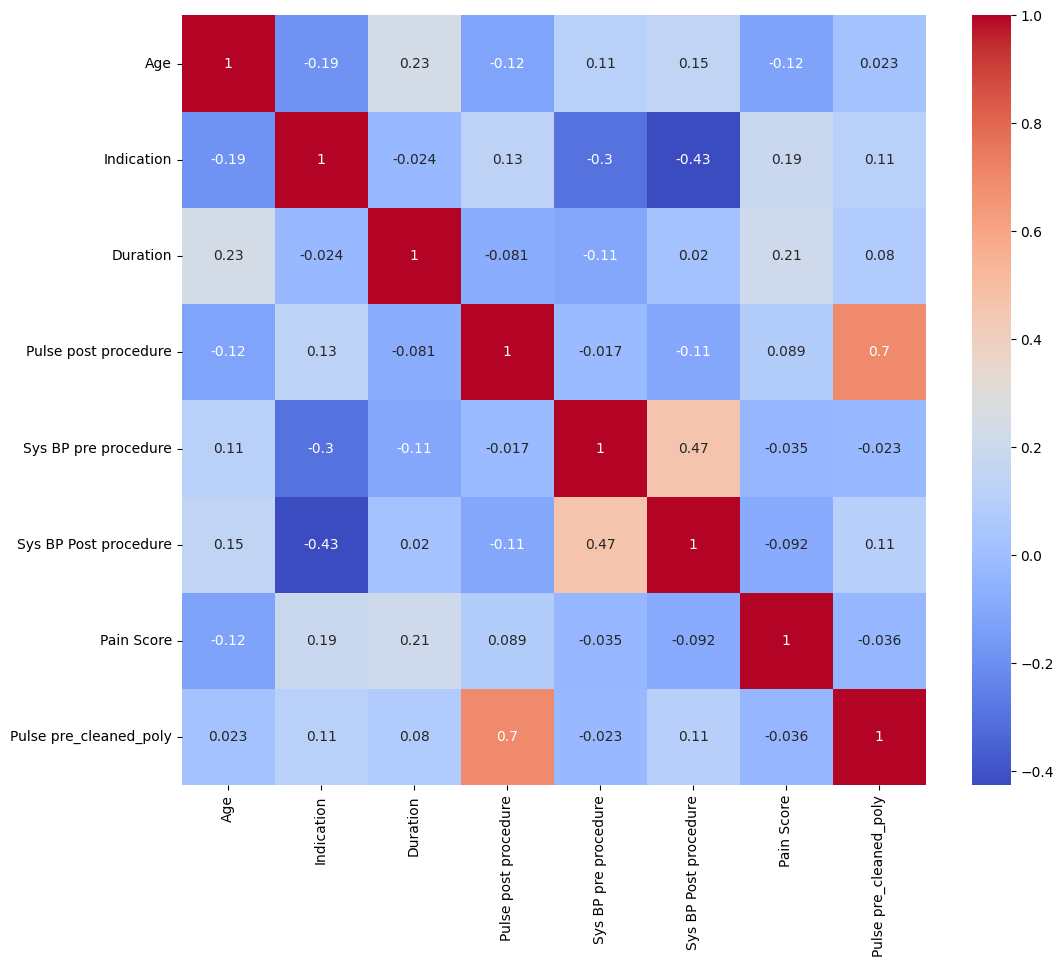

In [41]:
plt.figure(figsize=(12,10))
sns.heatmap(df_1.corr(),annot=True,yticklabels=True,cbar=True,cmap='coolwarm')
plt.show()

# Bivariate Analysis:Pain Score vs Other features(Countplot)
  

In [42]:
df_1.columns

Index(['Age', 'Group', 'Indication', 'Duration', 'Pulse post procedure',
       'Sys BP pre procedure', 'Sys BP Post procedure', 'Performed by',
       'Pain Score', 'Pulse pre_cleaned_poly'],
      dtype='object')

In [60]:
conditions1=  [
              (df_1['Age']>=18)&(df_1['Age']<=30),
              (df_1['Age']>30)&(df_1['Age']<=40),
              (df_1['Age']>40)&(df_1['Age']<=50),
              (df_1['Age']>50)&(df_1['Age']<=60),
              (df_1['Age']>60)&(df_1['Age']<=70),
              (df_1['Age']>70)&(df_1['Age']<=80)]

            #,(df['Age_2']>1.84)&(df['Age_2']<=1.903),(df['Age_2']>1.903)&(df['Age_2']<=2)]

values=['18-30','30-40','40-50','50-60','60-70','70-80']  #,'70-80','80+']

df_1['AgeRange']=np.select(conditions1,values)

conditions2=  [
              (df_1['Duration']>=2)&(df_1['Duration']<=3),
              (df_1['Duration']>3)&(df_1['Duration']<=4),
              (df_1['Duration']>4)&(df_1['Duration']<=5),
              (df_1['Duration']>5)&(df_1['Duration']<=6),
              (df_1['Duration']>6)&(df_1['Duration']<=7),
              (df_1['Duration']>7)&(df_1['Duration']<=8),
              (df_1['Duration']>8)&(df_1['Duration']<=9),
              (df_1['Duration']>9)&(df_1['Duration']<=10)]

            #,(df['Age_2']>1.84)&(df['Age_2']<=1.903),(df['Age_2']>1.903)&(df['Age_2']<=2)]

values=['2-3','3-4','4-5','5-6','6-7','7-8','8-9','9-10']  #,'70-80','80+']

df_1['DurationRange']=np.select(conditions2,values)

conditions3=  [
              (df_1['Pulse post procedure']<=65),
              (df_1['Pulse post procedure']>65)&(df_1['Pulse post procedure']<=70),
              (df_1['Pulse post procedure']>70)&(df_1['Pulse post procedure']<=75),
              (df_1['Pulse post procedure']>75)&(df_1['Pulse post procedure']<=80),
              (df_1['Pulse post procedure']>80)&(df_1['Pulse post procedure']<=85),
              (df_1['Pulse post procedure']>85)&(df_1['Pulse post procedure']<=90)]

            #,(df['Age_2']>1.84)&(df['Age_2']<=1.903),(df['Age_2']>1.903)&(df['Age_2']<=2)]

values=['less than 65','66-70','71-75','76-80','81-85','86-90']  #,'70-80','80+']

df_1['Post_Pulse_Range'] = np.select(conditions3,values)

conditions4=  [
              (df_1['Sys BP pre procedure']>=110)&(df_1['Sys BP pre procedure']<=120),
              (df_1['Sys BP pre procedure']>120)&(df_1['Sys BP pre procedure']<=130),
              (df_1['Sys BP pre procedure']>130)&(df_1['Sys BP pre procedure']<=140),
              (df_1['Sys BP pre procedure']>140)&(df_1['Sys BP pre procedure']<=150)]

            #,(df['Age_2']>1.84)&(df['Age_2']<=1.903),(df['Age_2']>1.903)&(df['Age_2']<=2)]

values=['110-120','121-130','131-140','141-150']  #,'70-80','80+']

df_1['Pre_BP_Range']=np.select(conditions4,values)

conditions5=  [
              (df_1['Sys BP Post procedure']>=110)&(df_1['Sys BP Post procedure']<=120),
              (df_1['Sys BP Post procedure']>120)&(df_1['Sys BP Post procedure']<=130),
              (df_1['Sys BP Post procedure']>130)&(df_1['Sys BP Post procedure']<=140),
              (df_1['Sys BP Post procedure']>140)&(df_1['Sys BP Post procedure']<=150)]

            #,(df['Age_2']>1.84)&(df['Age_2']<=1.903),(df['Age_2']>1.903)&(df['Age_2']<=2)]

values=['110-120','121-130','131-140','141-150']  #,'70-80','80+']

df_1['Post_BP_Range']=np.select(conditions5,values)

conditions6=  [
              (df_1['Pulse pre_cleaned_poly']<=65),
              (df_1['Pulse pre_cleaned_poly']>65)&(df_1['Pulse pre_cleaned_poly']<=70),
              (df_1['Pulse pre_cleaned_poly']>70)&(df_1['Pulse pre_cleaned_poly']<=75),
              (df_1['Pulse pre_cleaned_poly']>75)&(df_1['Pulse pre_cleaned_poly']<=80),
              (df_1['Pulse pre_cleaned_poly']>80)&(df_1['Pulse pre_cleaned_poly']<=85),
              (df_1['Pulse pre_cleaned_poly']>85)&(df_1['Pulse pre_cleaned_poly']<=90)]

            #,(df['Age_2']>1.84)&(df['Age_2']<=1.903),(df['Age_2']>1.903)&(df['Age_2']<=2)]

values=['less than 65','66-70','71-75','76-80','81-85','86-90']  #,'70-80','80+']

df_1['PrePulseRange']=np.select(conditions6,values)


In [61]:
#df_1.drop(['Age','Duration'])
df_1.columns

Index(['Age', 'Group', 'Indication', 'Duration', 'Pulse post procedure',
       'Sys BP pre procedure', 'Sys BP Post procedure', 'Performed by',
       'Pain Score', 'Pulse pre_cleaned_poly', 'AgeRange', 'DurationRange',
       'Post_Pulse_Range', 'Pre_BP_Range', 'Post_BP_Range', 'PrePulseRange'],
      dtype='object')

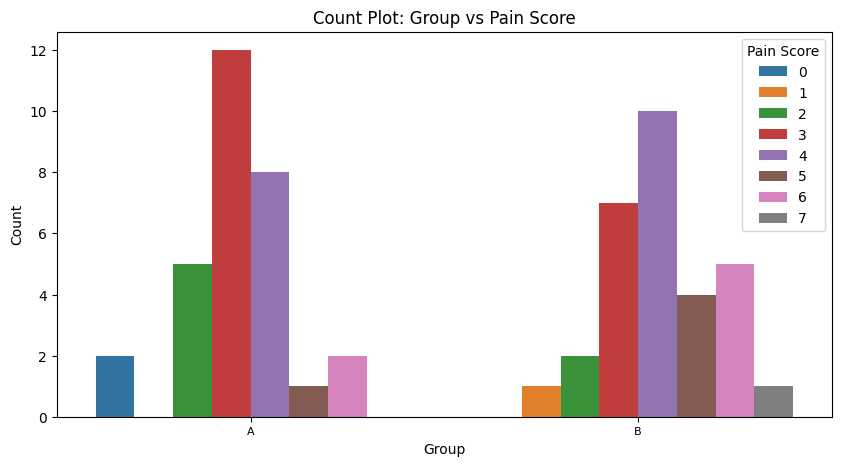

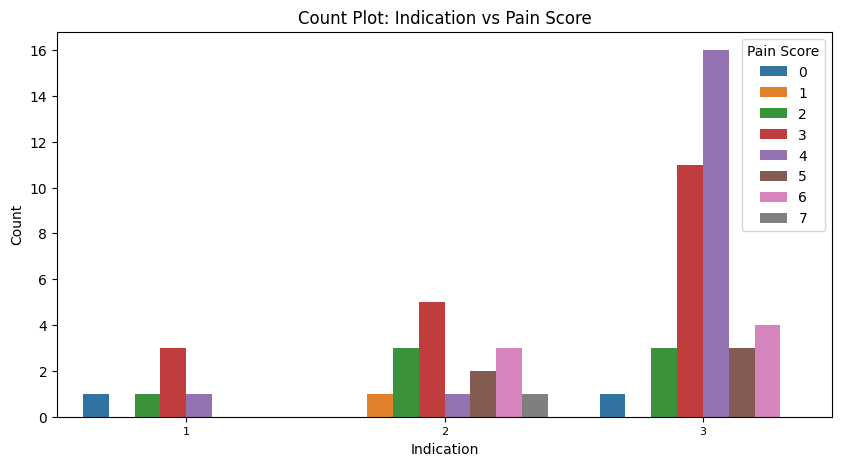

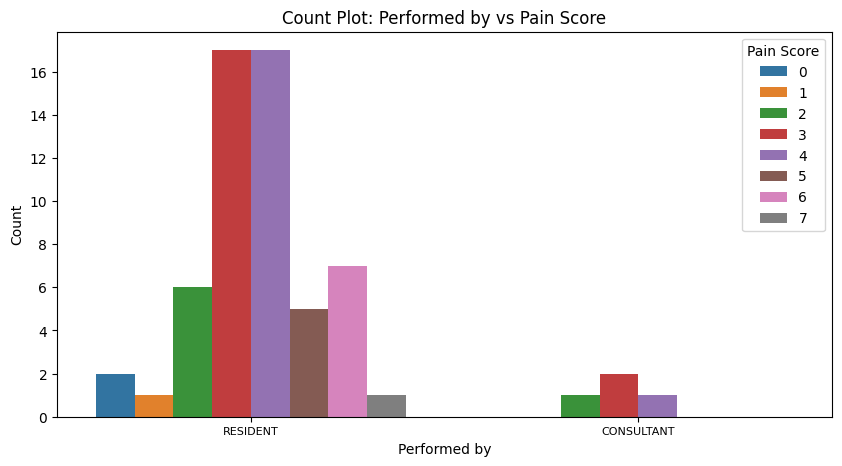

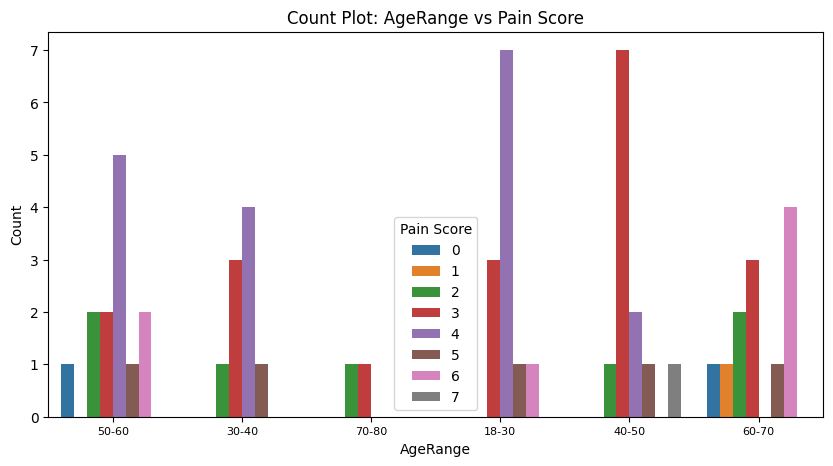

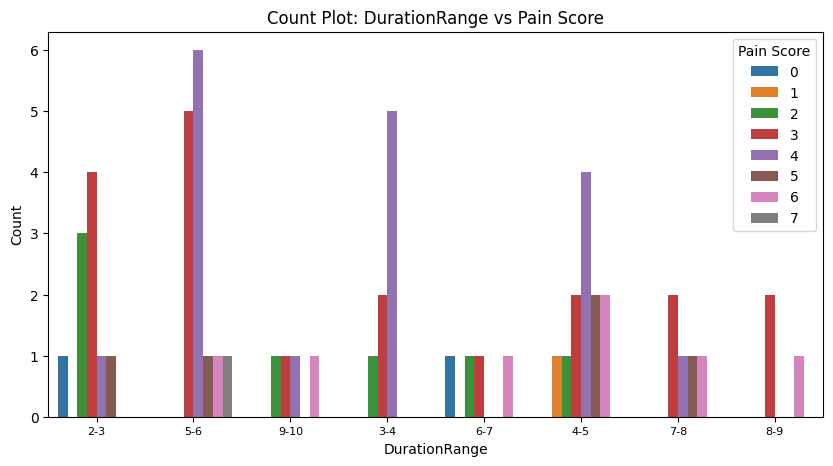

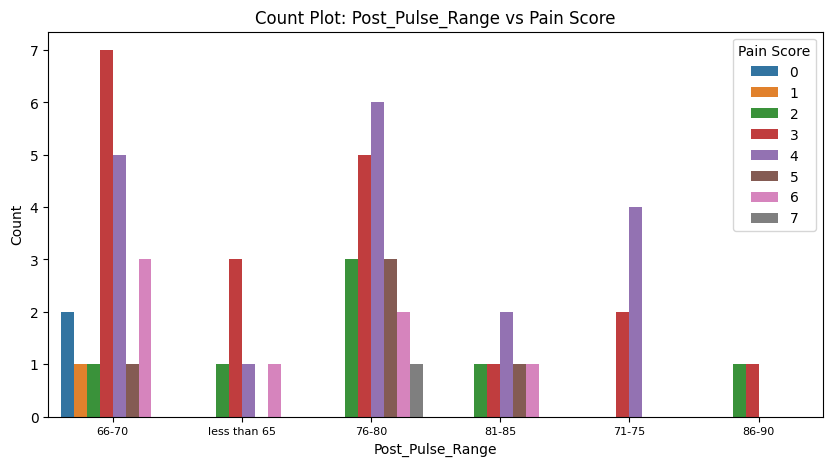

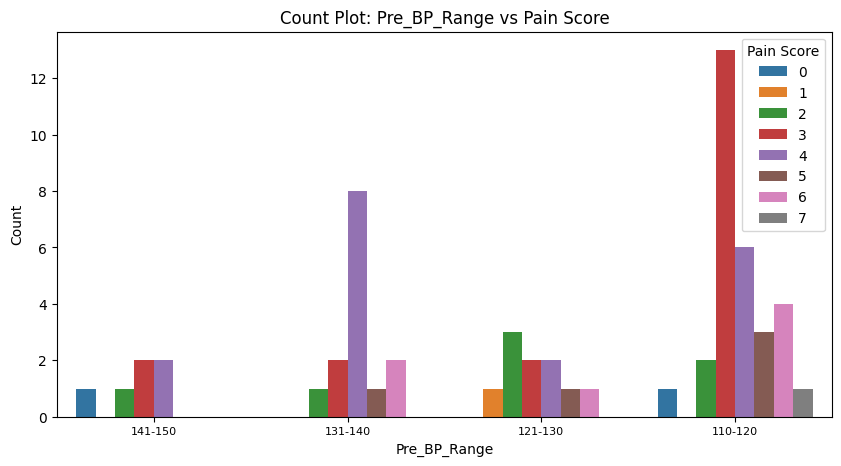

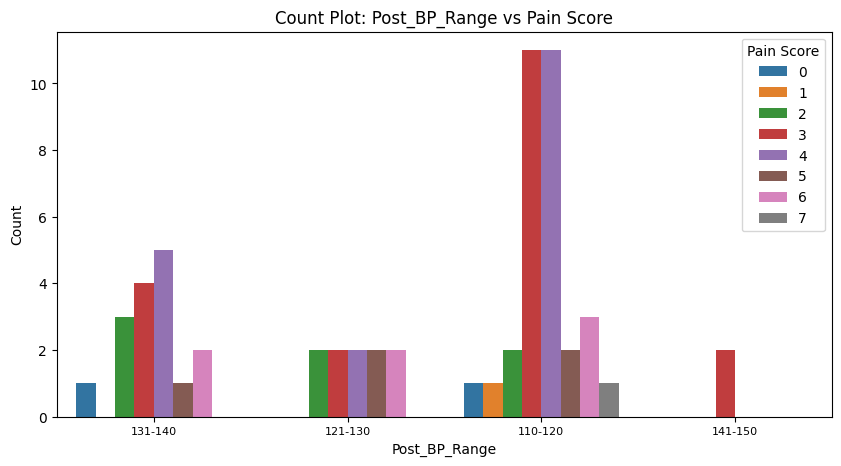

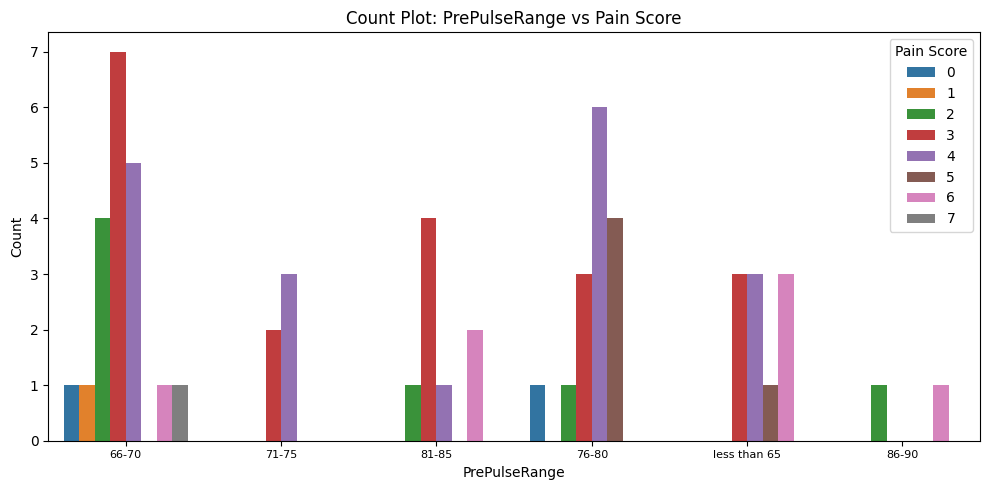

In [64]:
df_2=df_1.drop(['Age','Duration','Pulse post procedure','Sys BP pre procedure', 'Sys BP Post procedure','Pulse pre_cleaned_poly'],axis=1)
target_variable = 'Pain Score'
independent_variables = [col for col in df_2.columns if col != target_variable]
for i in independent_variables:
  fig,axarr=plt.subplots(figsize=(10,5))
  sns.countplot(data=df_2, x=i, hue=target_variable,ax=axarr)
  #sns.barplot(x=i,y=target_variable,data=df_1)
  plt.title(f'Count Plot: {i} vs {target_variable}')
  plt.xlabel(i)
  plt.ylabel('Count')
  plt.xticks(size=8)
plt.tight_layout()
plt.show()

# BarPlot: Comparison of Pre and post procedure Pulse

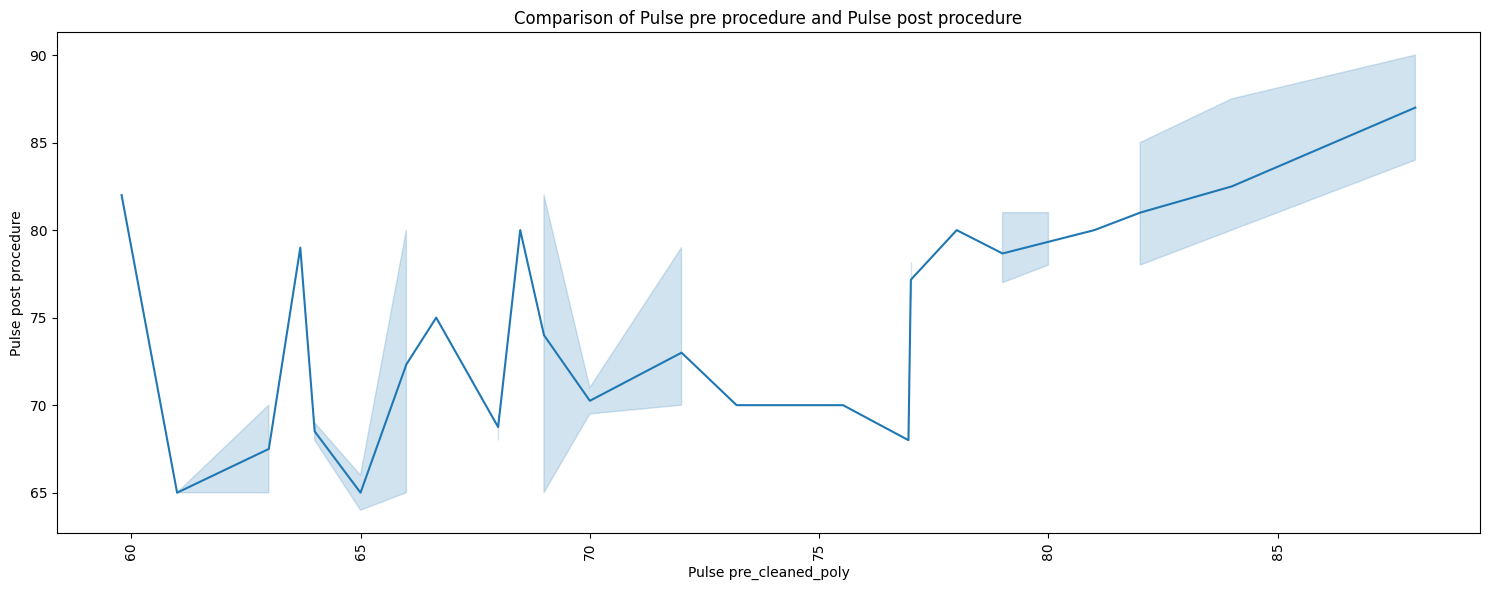

In [48]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=df_2, x='Pulse pre_cleaned_poly', y='Pulse post procedure')
#sns.barplot(data=df_2, x='Pulse pre_cleaned_poly' , y='Pulse post procedure')
plt.title('Comparison of Pulse pre procedure and Pulse post procedure')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# BarPlot: Comparison of Pre and post procedure  BP

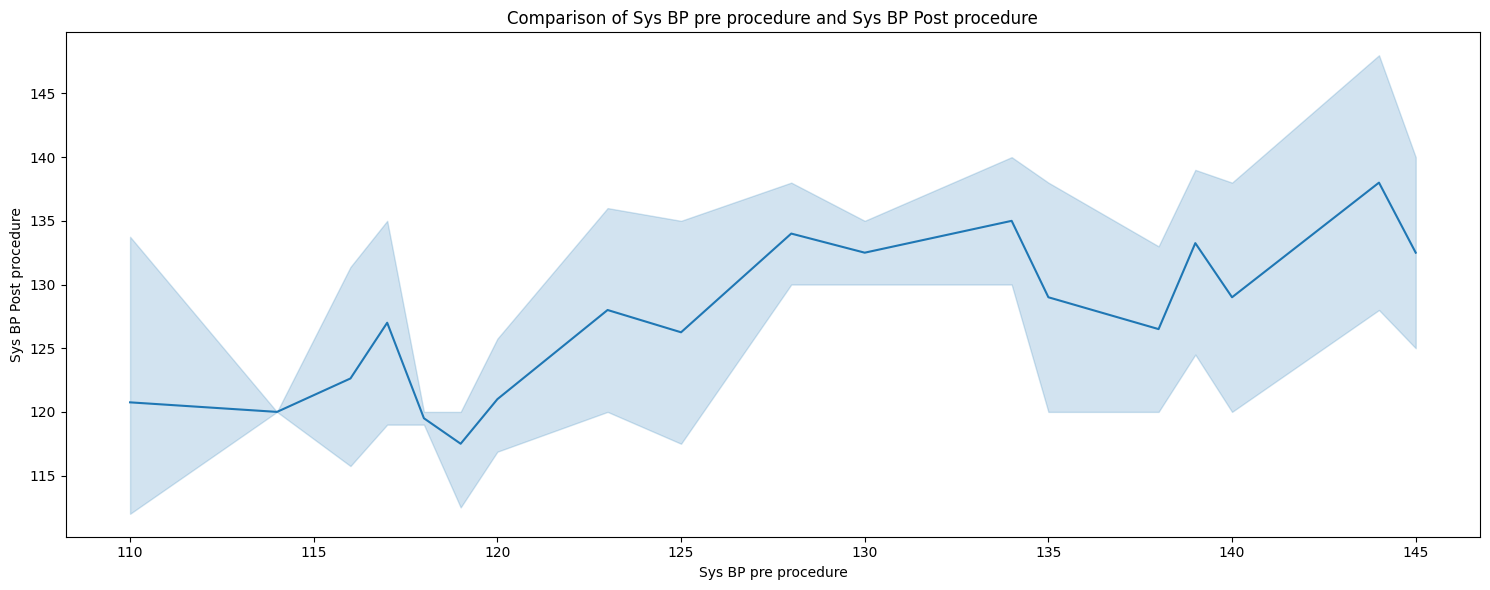

In [51]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=df_2, x='Sys BP pre procedure', y='Sys BP Post procedure')
#sns.barplot(data=df_2, x='Sys BP pre procedure', y='Sys BP Post procedure')
plt.title('Comparison of Sys BP pre procedure and Sys BP Post procedure')
plt.tight_layout()
plt.show()

# Countplot:Duration Vs Performed by

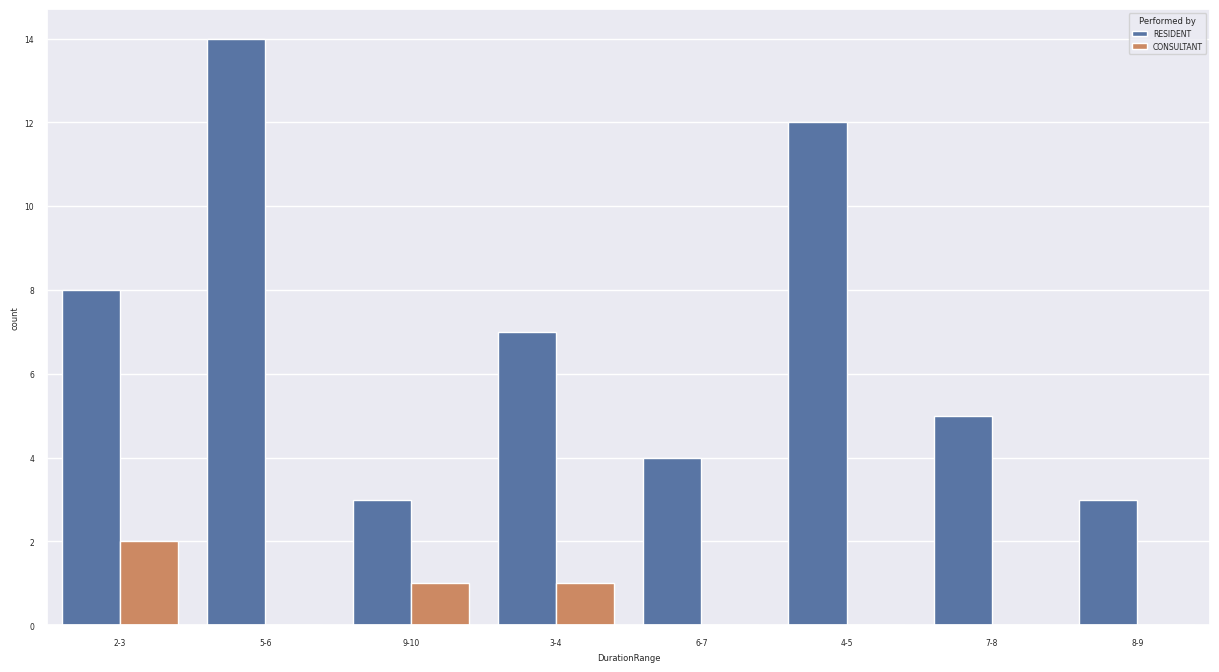

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(data=df_2, x='DurationRange', hue='Performed by')
plt.show()

# BarPlot:Comparing effect of pain on Group A Vs Group B

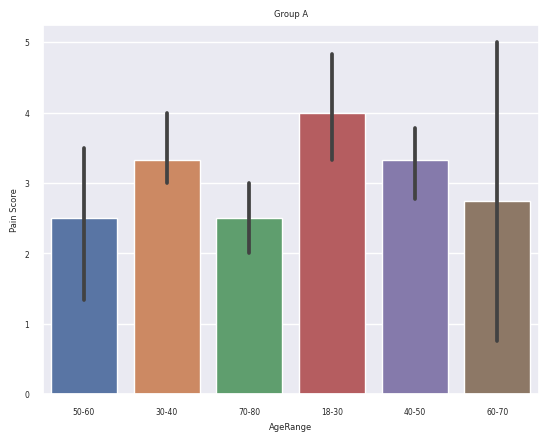

In [ ]:
subset1=df_2[df_2['Group'] == 'A']
sns.barplot(data=subset1, x='AgeRange', y='Pain Score')
plt.title("Group A")
plt.show()

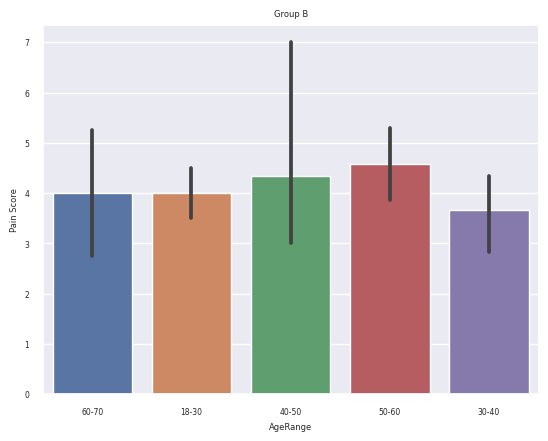

In [ ]:
subset2=df_2[df_2['Group'] == 'B']
sns.barplot(data=subset2, x='AgeRange', y='Pain Score')
plt.title("Group B")
plt.show()

# Barplot:Pulse and BP Difference w.r.t Duration

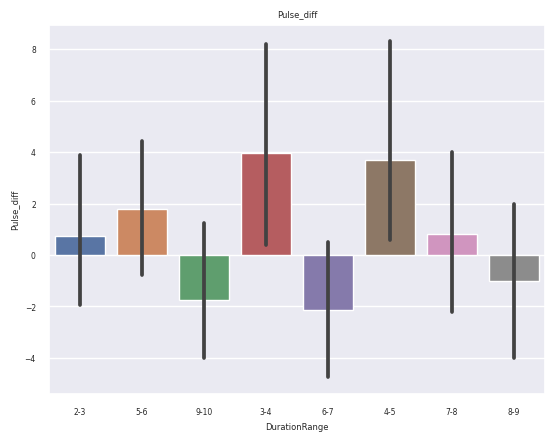

In [ ]:
df_2['Pulse_diff'] = df_2['Pulse post procedure'] - df_2['Pulse pre_cleaned_poly']
df_2['BP_diff'] = df_2['Sys BP pre procedure'] - df_2['Sys BP Post procedure']
sns.barplot(data=df_2, x='DurationRange', y='Pulse_diff')
plt.title("Pulse_diff")
plt.show()

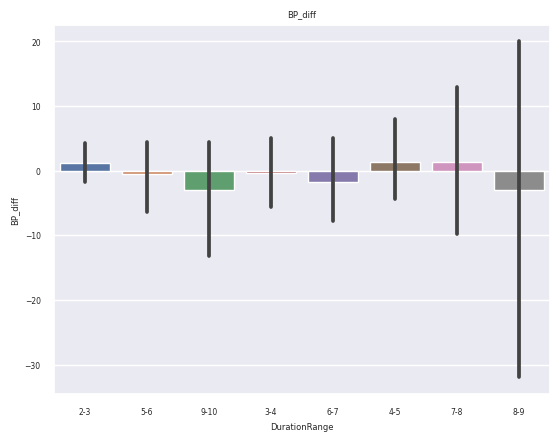

In [ ]:
sns.barplot(data=df_2, x='DurationRange', y='BP_diff')
plt.title("BP_diff")
plt.show()

# Pain Score effect due to Pulse and BP fluctuations

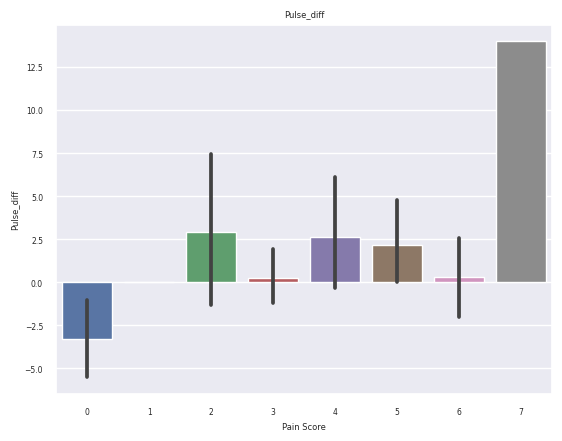

In [ ]:
sns.barplot(data=df_2, x='Pain Score', y='Pulse_diff')
plt.title("Pulse_diff")
plt.show()

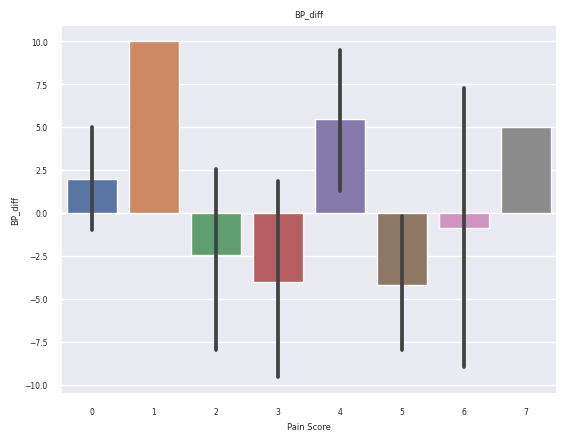

In [ ]:
sns.barplot(data=df_2, x='Pain Score', y='BP_diff')
plt.title("BP_diff")
plt.show()

# Multivariate Analysis: Pairplot

In [71]:
df_2.columns

Index(['Group', 'Indication', 'Performed by', 'Pain Score', 'AgeRange',
       'DurationRange', 'Post_Pulse_Range', 'Pre_BP_Range', 'Post_BP_Range',
       'PrePulseRange'],
      dtype='object')

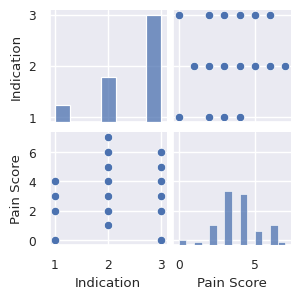

In [73]:
#plt.figure(figsize=(8, 6))
sns.set(font_scale=0.8)
sns.pairplot(df_2,height=1.5)
plt.show()

# Business Questions Answered:




1)	How is the Duration of the procedure affecting the pulse rate and BP?
3 to 5 Duration range has more difference in pulse, while they are not much fluctuations in BP w.r.t Duration range

What does 3 different indication score signify?

None of the procedure required analgesia. Why?

2)	Is there same effect of the procedure on Group A and Group B keeping age into account?
In Group B, pain score was more on people between 50-60
In Group A, pain score was seen more on people between 18-30

3)	What is minimum and maximum duration of the procedure?
Duration ranges from 2 to 10

4)	Is there significant effect on pain score, when performed by resident vs consultant?
When Performed by Resident, the pain score is between 2 to 4. However, there are only 4 people that performed by “consultant”.

5)	What are the fluctuations of Pulse rate Pre and post procedure? It is highly correlated and not much fluctuations

6)	What is the effect on BP before and after procedure? Almost correlated with some fluctuations

7)	What is Pain score based on Pulse and BP fluctuations?
When Pulse fluctuation is more ,The pain score is highest (7).When BP difference is around 10 ,pain score is 1.However BP is not having much effect on pain score

8)	Is there any relationship between the age and indication score?
No, not much. Very few people took indication 1 with all ages between 20 to 80,
Indication 2 was taken by people between age 30-70
Indication 3 was taken by maximum people with age ranging from 20-80

9)	Is performance of resident/consultant affecting the duration of procedure?
The graph shows, when performed by consultant takes mostly 2-4 while there is exception between 9-10

10)	Is the indication score affecting the duration of procedure and also if it affects the pain score?
Indication 2,3 has duration between 2 to 6 for most. Indication 1 had duration ranging from 4 to 10 (which is on the higher side)
Indication 3 had maximum people with pain score 3 and 4 and for indication 2, pain score is mostly 2,3

